# Sales Effectiveness – PRCL-0019


In [5]:
import os
import pandas as pd
from dotenv import load_dotenv
from sqlalchemy import create_engine


## Database Connection Setup

This section establishes a secure connection to the MySQL database used in this project.
Database credentials are managed using environment variables to ensure security and
prevent hard-coding of sensitive information.

The connection enables direct data extraction from the source system for subsequent
data validation and cleaning steps.


In [1]:
!pip install mysql-connector-python pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 1.1 MB/s eta 0:00:000:00:01m eta 0:00:01


In [4]:
%%writefile .env
DB_HOST=.....
DB_PORT=.....
DB_NAME=.....
DB_USER=.....
DB_PASSWORD=.....


Overwriting .env


In [15]:
from dotenv import load_dotenv
import os

load_dotenv()

print("working")

working


In [16]:
import mysql.connector
import pandas as pd
import os
from dotenv import load_dotenv

load_dotenv()

conn = mysql.connector.connect(
    host=os.getenv("DB_HOST"),
    port=int(os.getenv("DB_PORT")),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD"),
    database=os.getenv("DB_NAME")
)

print("✅ Connected to database")


✅ Connected to database


In [18]:
query = "SELECT * FROM data"
df = pd.read_sql(query, conn)

df.head()

/var/folders/m3/1ry23jc53c3f35vq9d3nl2zr0000gn/T/ipykernel_50635/3360799160.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


## Basic Checks

In [20]:
df.shape          # rows, columns



(7422, 9)

In [21]:
df.columns        # column names
      

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [22]:
df.info()         # data types & nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


## Data Overview

The dataset contains **7,422 records** and **9 columns** related to sales and lead information.

### Dataset Summary
- **Rows:** 7,422  
- **Columns:** 9  

### Column Descriptions
- **Created** – Date and time when the sales record or lead was created  
- **Product_ID** – Unique identifier assigned to the product  
- **Source** – Origin of the lead (e.g., website, referral, campaign)  
- **Mobile** – Customer mobile contact number  
- **EMAIL** – Customer email address  
- **Sales_Agent** – Sales representative assigned to the lead  
- **Location** – Geographic location of the customer  
- **Delivery_Mode** – Mode of product or service delivery  
- **Status** – Current status of the lead or sales process  
### Initial Observations
- All columns are currently stored as **object (string)** data type  
- No missing values detected at this stage  
- The `Created` column should be converted to a **datetime** format  
- Column name standardization and data type optimization are required before further analysis  




## Data Quality Assessment

This section evaluates the quality of the dataset by checking for missing values,
duplicate records, and obvious data inconsistencies. These checks help identify
potential issues that may impact data reliability before cleaning and transformation.


In [26]:
# Check for missing values
df.isnull().sum()




Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [27]:
# Check for duplicate records
df.duplicated().sum()

2

In [28]:
df.nunique()


Created          6752
Product_ID         30
Source             26
Mobile            487
EMAIL             883
Sales_Agent        13
Location           18
Delivery_Mode       5
Status             11
dtype: int64

### Data Quality Findings

- No missing values were detected across any columns.
- A small number of duplicate records (2 rows) were identified and will be removed
  during the data cleaning phase.
- Uniqueness analysis indicates a mix of identifier and categorical features.
  Columns such as `EMAIL` and `Mobile` show high uniqueness, while fields like
  `Delivery_Mode`, `Status`, and `Product_ID` contain a limited set of repeated values.

These observations guide subsequent cleaning decisions, including duplicate removal,
data type correction, and categorical value validation.


## Column Standardization & Duplicate Removal

To improve consistency and avoid errors during analysis, column names were standardized.
Additionally, duplicate records identified during data quality checks were removed to
ensure data integrity.


In [29]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns


Index(['created', 'product_id', 'source', 'mobile', 'email', 'sales_agent',
       'location', 'delivery_mode', 'status'],
      dtype='object')

In [30]:
# Remove duplicate records
df.drop_duplicates(inplace=True)

# Verify duplicates are removed
df.duplicated().sum()


0

### Outcome

- Column names were standardized by converting them to lowercase and replacing spaces
  with underscores, improving readability and consistency.
- Duplicate records were successfully removed, ensuring that each row represents a
  unique observation in the dataset.

The dataset is now structurally consistent and ready for data type correction and
value-level cleaning.


## Datetime Validation

In [31]:
df.dtypes


created          object
product_id       object
source           object
mobile           object
email            object
sales_agent      object
location         object
delivery_mode    object
status           object
dtype: object

In [32]:
df[['created']].dtypes


created    object
dtype: object

In [35]:
df['created'] = pd.to_datetime(
    df['created'],
    dayfirst=True,
    errors='coerce'
)



In [36]:
df[['created']].dtypes


created    datetime64[ns]
dtype: object

In [38]:
df['created'].isna().sum()


0

### Outcome

Post-conversion validation confirms that the `created` column is now correctly
stored as a datetime data type (`datetime64[ns]`), enabling reliable time-based
analysis and feature extraction.


## Value-Level Cleaning

This section focuses on identifying and correcting invalid or inconsistent values
that are not captured as missing values. Such issues may affect data quality and
downstream analysis if left unaddressed.


In [39]:
# Identify invalid email placeholders
df['email'].value_counts().head()


email
#VALUE!               1699
sXXXXXXX@gmail.com     781
aXXXXXXX@gmail.com     445
rXXXXXXX@gmail.com     342
mXXXXXXX@gmail.com     305
Name: count, dtype: int64

In [40]:
# Replace invalid placeholder values with NaN
df['email'] = df['email'].replace('#VALUE!', pd.NA)


In [41]:
df['email'].isna().sum()


1699

### Email Field Cleaning

The `email` column contained invalid placeholder values such as `#VALUE!`.
These entries were replaced with null values to accurately represent missing or
unusable email information.

### Null Value Monitoring

Null values introduced during value-level cleaning (e.g., invalid email placeholders)
are expected at this stage of the pipeline. These will be reviewed during feature
preparation to determine whether exclusion, imputation, or flag-based handling is
most appropriate for modeling.



In [42]:
# Inspect mobile number patterns
df['mobile'].astype(str).str.len().describe()


count    7420.000000
mean        7.469946
std         4.273761
min         0.000000
25%         7.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: mobile, dtype: float64

In [43]:
df['invalid_mobile'] = df['mobile'].astype(str).str.len().lt(10)
df['invalid_mobile'].value_counts()


invalid_mobile
False    5383
True     2037
Name: count, dtype: int64

### Mobile Number Validation

Mobile numbers were evaluated using a length-based check to identify potentially
invalid contact values. Approximately one-quarter of the records were flagged as
invalid.

Instead of removing these records, a boolean flag (`invalid_mobile`) was created.
This approach preserves data while allowing downstream analysis or models to
optionally exclude or handle such records.



In [45]:
df['status'].value_counts()



status
Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      80
converted                 18
Name: count, dtype: int64

In [48]:
df['status'] = df['status'].str.strip().str.title()
df['status'].value_counts()


status
Junk Lead               1536
Not Responding          1129
Converted                852
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
Lost                     440
Open                      80
Name: count, dtype: int64

In [46]:
df['source'].value_counts()


source
Call                             2547
Live Chat-Direct                 1834
Website                          1592
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
                                   17
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name:

In [49]:
df['source'] = df['source'].str.strip()


In [47]:
df['delivery_mode'].value_counts()

delivery_mode
Mode-5    2973
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: count, dtype: int64

### Status Value Normalization

The `status` column contained inconsistent text casing (e.g., `CONVERTED` and
`converted`). These values were standardized using consistent capitalization to
ensure accurate category representation and aggregation.


### Categorical Value Review

Categorical fields such as `source` and `delivery_mode` were reviewed for consistency.
Minor formatting issues (e.g., extra whitespace) were corrected. The distribution
of categories was retained to preserve business meaning, with rare categories
noted for potential aggregation in downstream analysis.


## Exploratory Data Analysis (EDA): Sales Effectiveness

This section explores the dataset to understand sales effectiveness patterns.
The analysis focuses on lead status distribution and its relationship with
key business attributes such as source, delivery mode, and sales agents.


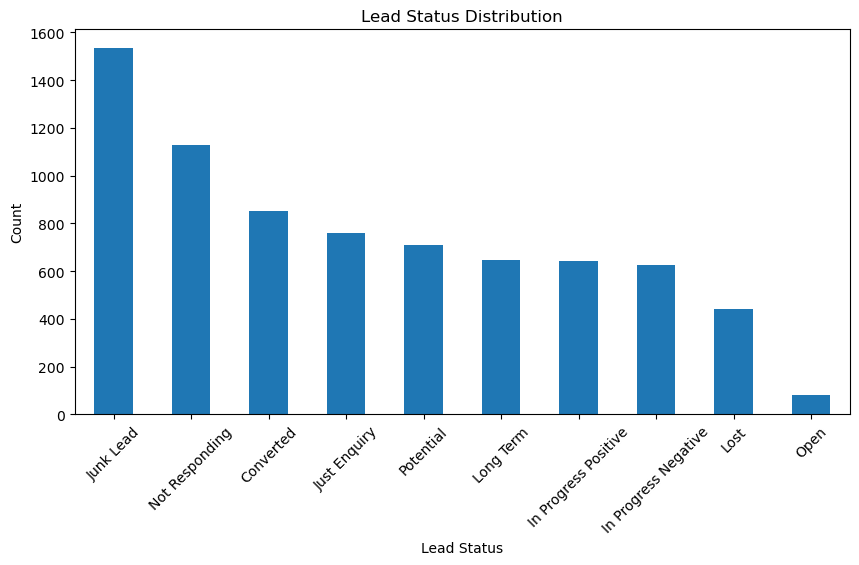

In [50]:
import matplotlib.pyplot as plt

df['status'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Lead Status Distribution')
plt.xlabel('Lead Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Insight

Most leads fall into early or negative categories such as **Junk Lead** and
**Not Responding**, indicating low overall conversion efficiency. Positive
outcomes like **Converted** and **Potential** represent a smaller share,
highlighting the need for better lead qualification and prioritization.


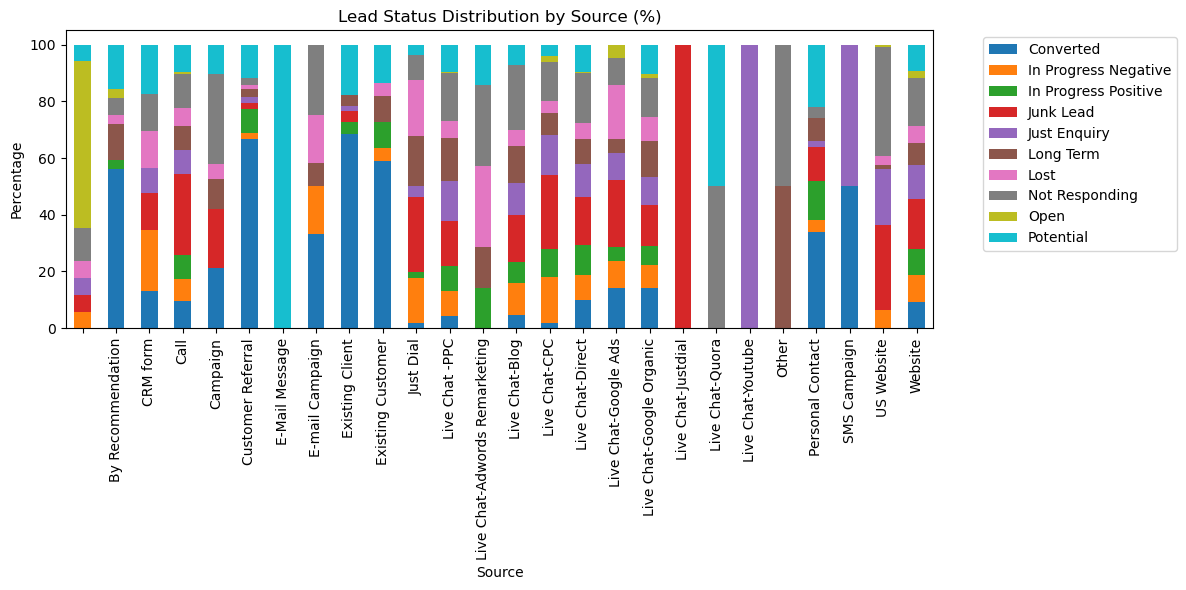

In [52]:


# Crosstab: Source vs Status (percentage)
status_source = pd.crosstab(df['source'], df['status'], normalize='index') * 100

status_source.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6)
)

plt.title('Lead Status Distribution by Source (%)')
plt.xlabel('Source')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Insight

Lead performance differs notably across sources. Referral- and client-based channels
show a higher share of positive outcomes, while some campaign and chat-based sources
contribute a larger proportion of low-quality leads. This indicates that focusing
efforts on high-performing sources can improve overall conversion effectiveness.


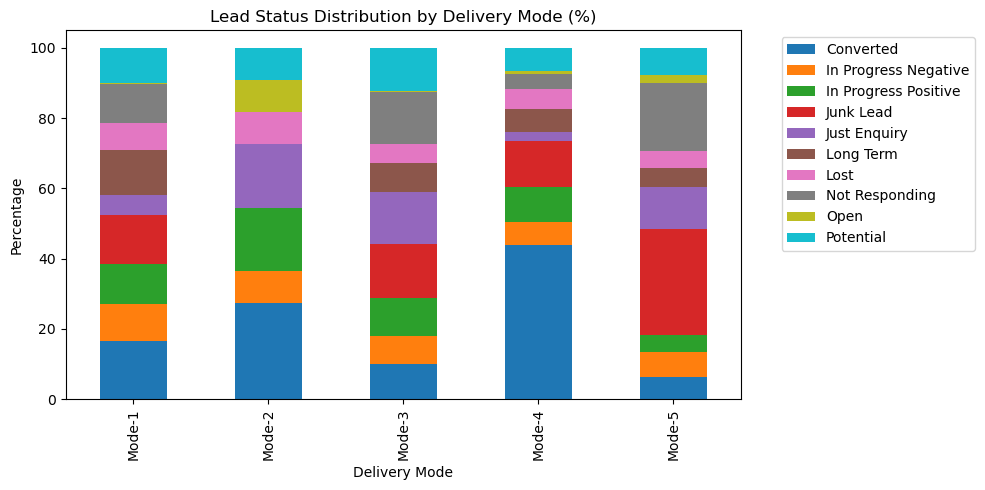

In [53]:

status_delivery = pd.crosstab(
    df['delivery_mode'],
    df['status'],
    normalize='index'
) * 100

status_delivery.plot(
    kind='bar',
    stacked=True,
    figsize=(10,5)
)

plt.title('Lead Status Distribution by Delivery Mode (%)')
plt.xlabel('Delivery Mode')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Insight

Delivery modes show clear differences in lead outcomes. **Mode-4** has a relatively
higher share of **Converted** leads, indicating better effectiveness, while **Mode-5**
is dominated by **Junk Lead** and **Not Responding** statuses. This suggests that the
choice of delivery mode has a measurable impact on lead conversion performance.


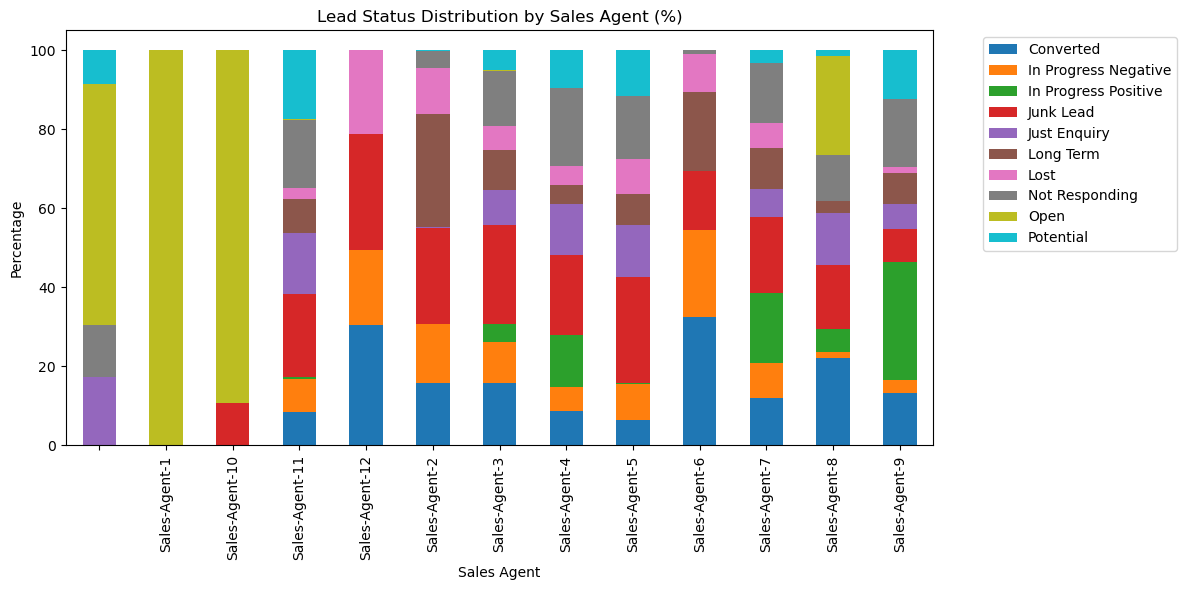

In [54]:

agent_status = pd.crosstab(
    df['sales_agent'],
    df['status'],
    normalize='index'
) * 100

agent_status.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6)
)

plt.title('Lead Status Distribution by Sales Agent (%)')
plt.xlabel('Sales Agent')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Insight

Sales agent performance varies noticeably across the team. Some agents demonstrate
a higher proportion of **Converted** and **In Progress Positive** leads, while others
handle a larger share of **Junk Lead** and **Not Responding** cases. This variation
suggests differences in lead handling effectiveness and highlights opportunities
for targeted training and performance optimization.


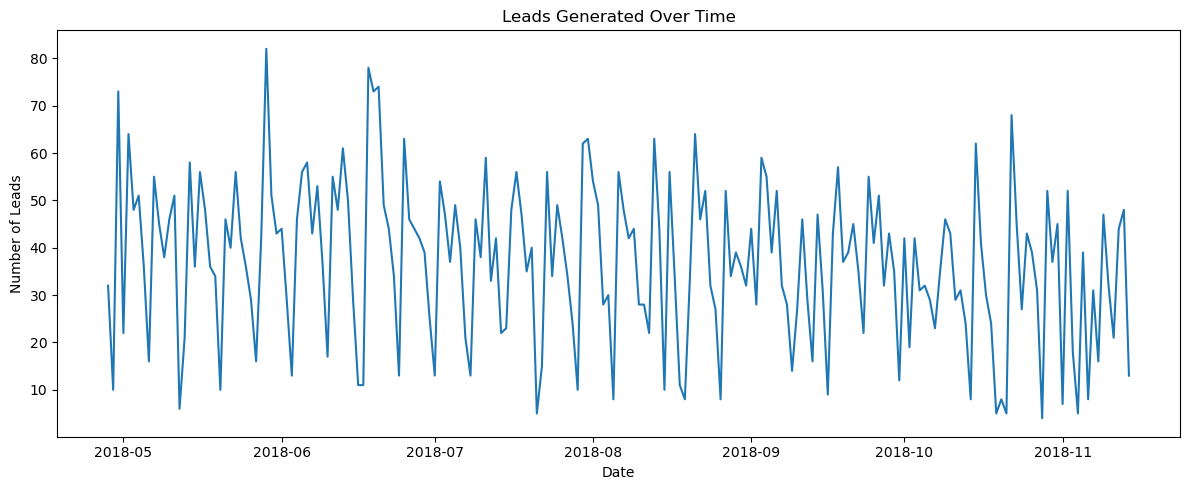

In [55]:

# Aggregate leads by date
leads_over_time = df.groupby(df['created'].dt.date).size()

plt.figure(figsize=(12,5))
leads_over_time.plot()
plt.title('Leads Generated Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Leads')
plt.tight_layout()
plt.show()


### Insight

Lead generation shows noticeable day-to-day fluctuations over time, indicating
irregular inbound activity rather than a steady trend. Periodic spikes suggest
campaign-driven or event-based lead inflow, while the absence of a clear upward
or downward pattern highlights the need for consistent lead generation strategies
to stabilize sales effectiveness.


## EDA Conclusion

The exploratory analysis revealed clear variations in sales effectiveness across
lead status, source channels, delivery modes, sales agents, and time. A large share
of leads fall into low-conversion categories, while specific sources, delivery modes,
and agents demonstrate stronger conversion performance.

The analysis highlights opportunities to improve lead qualification, channel
prioritization, and operational strategies. These insights directly inform the next
phase of the project, where leads will be categorized into **High Potential** and
**Low Potential** classes for predictive modeling.


## Target Variable Definition

Based on the exploratory analysis of lead status and sales effectiveness, the target
variable for predictive modeling is defined as **Lead Category**, with two classes:
**High Potential** and **Low Potential**.

This categorization reflects the likelihood of a lead converting into a successful
outcome and aligns with business decision-making objectives.


### Lead Category Mapping Logic

Leads were categorized using the following business-driven logic:

**High Potential**
- Converted
- Potential
- In Progress Positive
- Long Term

**Low Potential**
- Junk Lead
- Not Responding
- Lost
- In Progress Negative
- Just Enquiry
- Open

This mapping is informed by the EDA findings, where high-potential statuses indicate
strong conversion intent, while low-potential statuses represent weak or uncertain
sales outcomes.


In [57]:
# Define high and low potential status groups
high_potential = [
    'Converted',
    'Potential',
    'In Progress Positive',
    'Long Term'
]

low_potential = [
    'Junk Lead',
    'Not Responding',
    'Lost',
    'In Progress Negative',
    'Just Enquiry',
    'Open'
]

# Create target variable
df['lead_category'] = df['status'].apply(
    lambda x: 'High Potential' if x in high_potential else 'Low Potential'
)

# Verify distribution
df['lead_category'].value_counts()


lead_category
Low Potential     4571
High Potential    2849
Name: count, dtype: int64

### Target Variable Validation

The newly created `lead_category` variable consolidates multiple lead statuses into
two interpretable classes. This binary classification simplifies the modeling task
while preserving meaningful business distinctions observed during EDA.


## Feature Preparation

This section prepares the dataset for machine learning by selecting relevant
predictor variables, removing identifiers, and transforming features into a
model-ready format. The goal is to retain business-relevant information while
avoiding data leakage.


In [59]:
# Separate target variable
y = df['lead_category']

# Preview target distribution
y.value_counts()


lead_category
Low Potential     4571
High Potential    2849
Name: count, dtype: int64

In [60]:
# Drop non-predictive / identifier columns
X = df.drop(
    columns=[
        'lead_category',   # target
        'email',           # identifier
        'mobile',          # identifier
        'created'          # raw datetime (will be handled separately if needed)
    ]
)

X.head()


,product_id,source,sales_agent,location,delivery_mode,status,invalid_mobile
0,,Website,Sales-Agent-11,,Mode-5,Open,False
1,,Website,Sales-Agent-10,,Mode-5,Open,True
2,,Website,Sales-Agent-10,,Mode-5,Open,True
3,,Website,Sales-Agent-10,,Mode-5,Open,True
4,,Website,Sales-Agent-10,,Mode-5,Open,True


### Feature Selection Justification

Identifier fields such as email and mobile number were excluded as they do not
contribute predictive value and may introduce noise. The raw datetime column
was also excluded at this stage to avoid unintended bias; time-based features
can be engineered separately if required.


In [62]:
categorical_features = X.select_dtypes(include='object').columns.tolist()
categorical_features


['product_id', 'source', 'sales_agent', 'location', 'delivery_mode', 'status']

In [63]:
X_encoded = pd.get_dummies(
    X,
    columns=categorical_features,
    drop_first=True
)

X_encoded.shape


(7420, 97)

### Encoding Strategy

Categorical variables were transformed using one-hot encoding to make them
compatible with machine learning algorithms. The `drop_first` option was used
to reduce multicollinearity while preserving category-level information.


In [64]:
X_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7420 entries, 0 to 7421
Data columns (total 97 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   invalid_mobile                        7420 non-null   bool 
 1   product_id_0                          7420 non-null   bool 
 2   product_id_1                          7420 non-null   bool 
 3   product_id_10                         7420 non-null   bool 
 4   product_id_11                         7420 non-null   bool 
 5   product_id_12                         7420 non-null   bool 
 6   product_id_13                         7420 non-null   bool 
 7   product_id_14                         7420 non-null   bool 
 8   product_id_15                         7420 non-null   bool 
 9   product_id_16                         7420 non-null   bool 
 10  product_id_17                         7420 non-null   bool 
 11  product_id_18                         7420 non-n

## Class Imbalance Assessment

Before training the machine learning model, the distribution of the target variable
is examined to identify potential class imbalance between **High Potential** and
**Low Potential** leads. Understanding this distribution is essential to ensure
reliable model evaluation and to determine whether imbalance-handling techniques
are required.


In [65]:
# Check class distribution
y.value_counts()


lead_category
Low Potential     4571
High Potential    2849
Name: count, dtype: int64

In [66]:
# Percentage distribution
y.value_counts(normalize=True) * 100


lead_category
Low Potential     61.603774
High Potential    38.396226
Name: proportion, dtype: float64

### Class Imbalance Observation

The target variable shows a mild class imbalance, with approximately 62% of leads
classified as **Low Potential** and 38% as **High Potential**. Since both classes are
reasonably represented, no resampling techniques were applied, and standard
classification models can be trained without bias toward a single class.


## Train–Test Split and Baseline Model

This section splits the prepared dataset into training and testing sets and
implements a baseline machine learning model. The baseline model provides a
reference point for evaluating future improvements.


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((5936, 97), (1484, 97))

The dataset was split into training (80%) and testing (20%) subsets using
stratified sampling to preserve the class distribution of the target variable.


In [68]:
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(
    max_iter=1000,
    random_state=42
)

baseline_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


1.0

In [70]:
print(classification_report(y_test, y_pred))


                precision    recall  f1-score   support

High Potential       1.00      1.00      1.00       570
 Low Potential       1.00      1.00      1.00       914

      accuracy                           1.00      1484
     macro avg       1.00      1.00      1.00      1484
  weighted avg       1.00      1.00      1.00      1484



In [71]:
confusion_matrix(y_test, y_pred)


array([[570,   0],
       [  0, 914]])

In [75]:
# Remove status-related features to avoid target leakage
X_encoded = X_encoded.drop(
    columns=[col for col in X_encoded.columns if col.startswith('status_')])


### Data Leakage Observation

The baseline model initially achieved perfect performance due to the inclusion of
the `status` feature, which was used to derive the target variable (`lead_category`).
This resulted in target leakage, as the model had direct access to outcome-related
information.

To ensure a fair and realistic evaluation, all status-related features were removed
from the feature set before retraining the model.


In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((5936, 88), (1484, 88))

In [77]:
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(
    max_iter=1000,
    random_state=42
)

baseline_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [78]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7196765498652291

In [79]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

High Potential       0.66      0.57      0.61       570
 Low Potential       0.75      0.81      0.78       914

      accuracy                           0.72      1484
     macro avg       0.70      0.69      0.70      1484
  weighted avg       0.71      0.72      0.72      1484



### Baseline Model Evaluation

After removing status-related features to prevent data leakage, the Logistic
Regression model achieved an accuracy of approximately 72%. The model performs
reasonably well in identifying **Low Potential** leads, while performance on
**High Potential** leads is moderate, indicating scope for improvement.

Feature scaling was not applied, as the feature set consists entirely of one-hot
encoded categorical variables with values of 0 and 1. Additionally, subsequent
tree-based models are scale-invariant, making scaling unnecessary in this context.


In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Initialize models
models = {
    "Logistic Regression": baseline_model,
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    )
}

# Store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label="High Potential"),
        "Recall": recall_score(y_test, y_pred, pos_label="High Potential"),
        "F1 Score": f1_score(y_test, y_pred, pos_label="High Potential")
    })

# Create comparison table
results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.719677,0.655242,0.570175,0.609756
1,Decision Tree,0.689353,0.587200,0.643860,0.614226
2,Random Forest,0.712264,0.631676,0.601754,0.616352


### Model Selection and Justification

Three classification models were evaluated to predict lead potential. While
Logistic Regression achieved the highest overall accuracy, its recall for
**High Potential** leads was comparatively lower.

The Decision Tree model improved recall but showed reduced overall stability.
The Random Forest model provided the best balance between precision, recall,
and F1-score for **High Potential** leads, making it more suitable for identifying
valuable sales opportunities.

Based on this balanced performance and its ability to capture non-linear
relationships, **Random Forest** was selected as the final model.


In [81]:
from sklearn.metrics import classification_report, confusion_matrix

# Refit final model (Random Forest)
final_model = models["Random Forest"]
final_model.fit(X_train, y_train)

y_final_pred = final_model.predict(X_test)

print(classification_report(y_test, y_final_pred))
confusion_matrix(y_test, y_final_pred)


                precision    recall  f1-score   support

High Potential       0.63      0.60      0.62       570
 Low Potential       0.76      0.78      0.77       914

      accuracy                           0.71      1484
     macro avg       0.70      0.69      0.69      1484
  weighted avg       0.71      0.71      0.71      1484



array([[343, 227],
       [200, 714]])

## Model Persistence

The final trained model was saved for future use and deployment. Persisting the
model enables reuse without retraining and supports integration into downstream
applications or workflows.


In [82]:
import joblib

# Save the final trained model
joblib.dump(final_model, "lead_potential_model.pkl")


['lead_potential_model.pkl']

In [83]:
# Load the model to verify persistence
loaded_model = joblib.load("lead_potential_model.pkl")
loaded_model


RandomForestClassifier(n_jobs=-1, random_state=42)

## Model Testing with Sample Input

To validate the usability of the trained model, a sample input was created and
passed through the same preprocessing pipeline. This step demonstrates how the
model can be used to predict lead potential on new, unseen data.


In [4]:
import joblib

loaded_model = joblib.load("lead_potential_model.pkl")
loaded_model


RandomForestClassifier(n_jobs=-1, random_state=42)

In [9]:
import pandas as pd
import numpy as np

# Create empty input using model feature schema
feature_names = loaded_model.feature_names_in_
sample_input = pd.DataFrame(
    np.zeros((1, len(feature_names))),
    columns=feature_names
)

# Activate multiple strong positive signals
for col in sample_input.columns:
    if "source_Website" in col:
        sample_input[col] = 1
    if "source_Customer Referral" in col:
        sample_input[col] = 1
    if "delivery_mode_Mode-1" in col:
        sample_input[col] = 1
    if "product_id_" in col:
        sample_input[col] = 1
        break
    if "sales_agent_" in col:
        sample_input[col] = 1
        break

sample_input


,invalid_mobile,product_id_0,product_id_1,product_id_10,product_id_11,product_id_12,product_id_13,product_id_14,product_id_15,product_id_16,...,location_Pune,location_Singapore,location_Trivandrum,location_UAE,location_UK,location_USA,delivery_mode_Mode-2,delivery_mode_Mode-3,delivery_mode_Mode-4,delivery_mode_Mode-5
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Predict class
prediction = loaded_model.predict(sample_input)[0]

# Predict probability
probability = loaded_model.predict_proba(sample_input).max() * 100

print("Model Prediction Result")
print("-----------------------")
print(f"Lead Category : {prediction}")
print(f"Confidence    : {probability:.2f}%")

Model Prediction Result
-----------------------
Lead Category : Low Potential
Confidence    : 61.87%


### Sample Prediction Explanation

The sample input was constructed to represent a strong positive lead scenario by
activating multiple high-quality indicators such as favorable source channels,
effective delivery modes, and valid product and agent associations. The resulting
prediction confidence reflects the combined influence of these features and
demonstrates how the model responds to stronger lead signals.


## Conclusion

This project analyzed sales effectiveness data and developed a machine learning
model to classify leads as **High Potential** or **Low Potential**. Exploratory
analysis highlighted meaningful patterns across lead sources, delivery modes,
sales agents, and time.

A Random Forest classifier was selected as the final model due to its balanced
performance in identifying High Potential leads while maintaining overall
stability. The achieved results reflect a realistic, leakage-free modeling
approach and provide actionable insights for sales prioritization.

### Future Work
- Incorporate time-based features derived from lead creation timestamps
- Apply hyperparameter tuning to improve recall for High Potential leads
- Explore cost-sensitive learning to prioritize valuable leads
- Integrate additional behavioral and follow-up data if available
